In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"younisbashir","key":"6ae725079c4f3534bf7b3f2a24207cfc"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 657M/675M [00:05<00:00, 159MB/s]
100% 675M/675M [00:05<00:00, 137MB/s]


# Importing The Modules

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cell-images-for-detecting-malaria.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [3]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2
import random
from matplotlib.image import imread
import seaborn as sns
from collections import Counter
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras.models import *
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')

# Read Data

In [4]:
healthy_files = os.listdir("/content/files/cell_images/Parasitized")
infected_files = os.listdir("/content/files/cell_images/Uninfected")


In [5]:
healthy_files[0]

'C132P93ThinF_IMG_20151004_153030_cell_17.png'

## ***Data Preparation***

In [10]:
def data_prep(parasitized,uninfected):

    parasitized= ["/content/files/cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["/content/files/cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(healthy_files, infected_files)

In [12]:
len(healthy_files),len(infected_files)

(13780, 13780)

In [13]:
df['Labels']

0        parasitized
1        parasitized
2        parasitized
3        parasitized
4        parasitized
            ...     
27555     uninfected
27556     uninfected
27557     uninfected
27558     uninfected
27559     uninfected
Name: Labels, Length: 27560, dtype: object

# Displaying Sample Images For Each Of The Two Labels

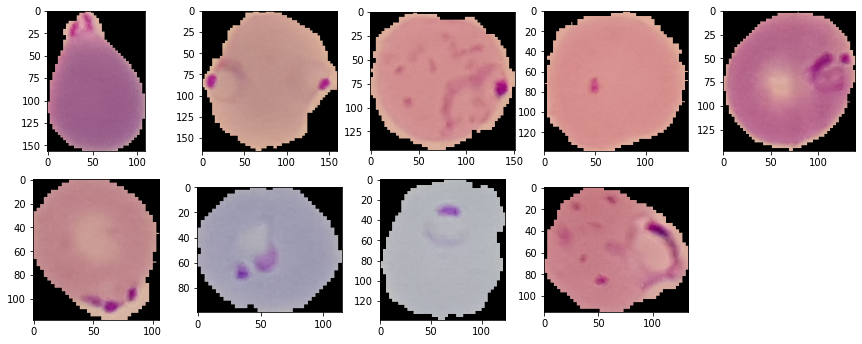

In [14]:
# lets see a variety of parasitized cells
filenames = random.sample(healthy_files , 10)

# here we will see 25 images of Parasitized cell images
plt.figure(figsize=(15, 15))  # figure size
for i in range(1, len(filenames)):
    row = i
    image = imread('/content/files/cell_images/Parasitized/' + filenames[i])
    plt.subplot(5, 5, row)
    plt.imshow(image)
plt.show()

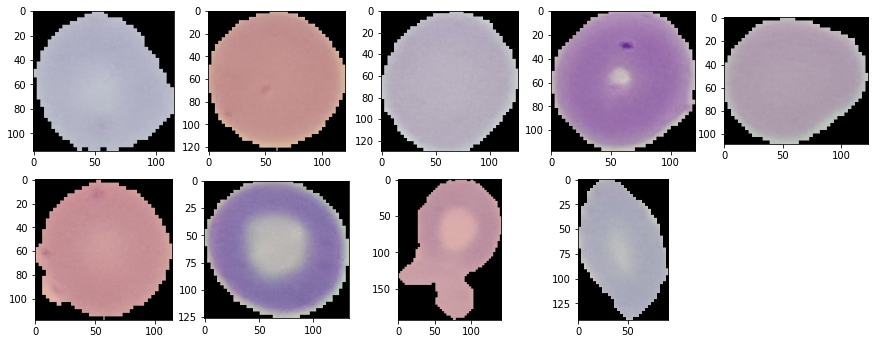

In [15]:
# lets see a variety of parasitized cells
filenames = random.sample(infected_files , 10)

# here we will see 25 images of Parasitized cell images
plt.figure(figsize=(15, 15))  # figure size
for i in range(1, len(filenames)):
    row = i
    image = imread('/content/files/cell_images/Uninfected/' + filenames[i])
    plt.subplot(5, 5, row)
    plt.imshow(image)
plt.show()

Text(0.5, 1.0, 'Distribution of samples according to the categories')

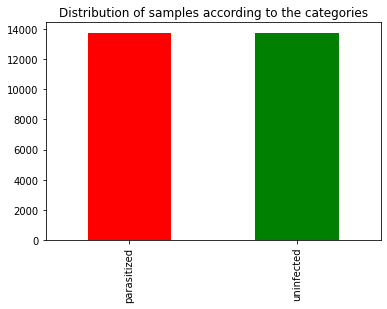

In [17]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')

# Split Data

In [19]:
train, test = train_test_split(df, test_size = .20)

## **Augmenting The Data**

In [20]:

img_datagen = ImageDataGenerator(rotation_range=20,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True,
                                 fill_mode='nearest', validation_split=0.2)

In [21]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [22]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')

    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()

In [24]:
 x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path',
                                               y_col='Labels',  class_mode='binary',
                                               target_size=(134,134), shuffle=False,
                                               batch_size=10, seed=10, subset='training')

Found 17637 validated image filenames belonging to 2 classes.


In [25]:
 x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path',
                                             y_col='Labels',class_mode='binary',
                                             target_size=(134,134), shuffle=False,
                                             batch_size=10, seed=10, subset='validation')
    

Found 1102 validated image filenames belonging to 2 classes.


# Building CNN

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 55s 543ms/step - loss: 2.1213 - accuracy: 0.5290 - val_loss: 0.6883 - val_accuracy: 0.5300
Epoch 2/10
100/100 [==============================] - 48s 486ms/step - loss: 0.6952 - accuracy: 0.5220 - val_loss: 0.6874 - val_accuracy: 0.5520
Epoch 3/10
100/100 [==============================] - 42s 418ms/step - loss: 0.6933 - accuracy: 0.5130 - val_loss: 0.6863 - val_accuracy: 0.5620
Epoch 4/10
100/100 [==============================] - 42s 421ms/step - loss: 0.6989 - accuracy: 0.4980 - val_loss: 0.6877 - val_accuracy: 0.5350
Epoch 5/10
100/100 [==============================] - 41s 408ms/step - loss: 0.6954 - accuracy: 0.5090 - val_loss: 0.7047 - val_accuracy: 0.4830


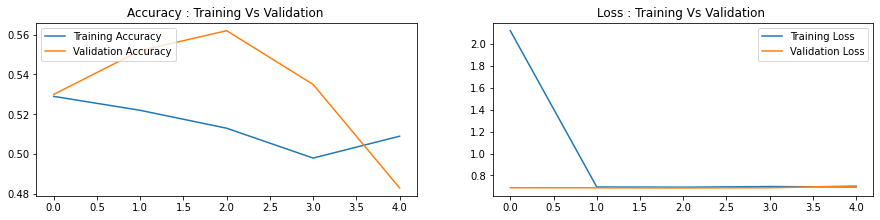

In [28]:
def cnn_model(df, train, test, my_callbacks):
    
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path',
                                               y_col='Labels',  class_mode='binary',
                                               target_size=(134,134), shuffle=False,
                                               batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path',
                                             y_col='Labels',class_mode='binary',
                                             target_size=(134,134), shuffle=False,
                                             batch_size=10, seed=10, subset='validation')
    
    model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model_history = model.fit_generator(generator = x_train, 
                   steps_per_epoch = 100,
                   epochs = 10 ,
                   validation_data = x_test,
                   validation_steps = 100,
                  callbacks=my_callbacks)
    
    return model_history

    
plot_loss_and_accuracy(cnn_model(df, train, test, my_callbacks))


# **Building ResNet50**

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 226s 2s/step - loss: 0.6131 - accuracy: 0.8210 - val_loss: 0.8903 - val_accuracy: 0.8220
Epoch 2/5
100/100 [==============================] - 209s 2s/step - loss: 0.4280 - accuracy: 0.8660 - val_loss: 1.4457 - val_accuracy: 0.8650
Epoch 3/5
100/100 [==============================] - 204s 2s/step - loss: 0.5509 - accuracy: 0.8720 - val_loss: 3.5871 - val_accuracy: 0.7640


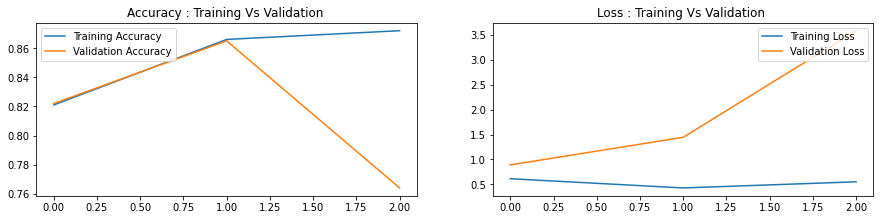

In [29]:
def resnet_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    resnet_model=tf.keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    model_history = model.fit(x_train,
                              steps_per_epoch=100,
                              validation_data=x_test,
                              validation_steps=100,
                              epochs = 5,
                              callbacks=my_callbacks)
    
    
    return model_history
    
plot_loss_and_accuracy(resnet_model(df, train, test, my_callbacks))

# Building VGG19

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/5
100/100 [==============================] - 3030s 30s/step - loss: 1.1191 - accuracy: 0.5340 - val_loss: 0.6939 - val_accuracy: 0.4840
Epoch 2/5
100/100 [==============================] - 3040s 30s/step - loss: 0.7704 - accuracy: 0.5110 - val_loss: 0.6857 - val_accuracy: 0.5550
Epoch 3/5
100/100 [==============================] - 2994s 30s/step - loss: 0.6978 - accuracy: 0.5100 - val_loss: 0.4179 - val_accuracy: 0.7940
Epoch 4/5
100/100 [==============================] - 3017s 30s/step - loss: 0.3498 - accuracy: 0.8760 - val_loss: 0.2215 - val_accuracy: 0.9520
Epoch 5/5
100/100 [==============================] - 3015s 30s/step - loss: 0.2855 - accuracy: 0.9230 - val_loss: 0.3171 - val_accuracy: 0.9410


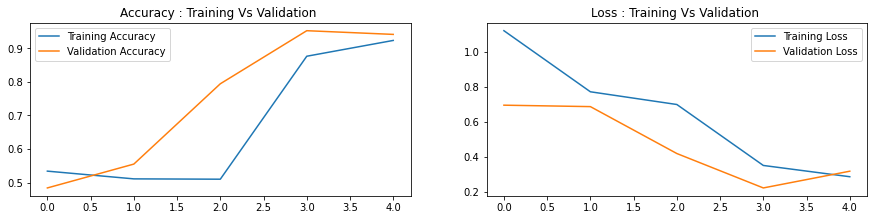

In [30]:
def vgg19_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(224,224,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 5 ,
    callbacks=my_callbacks)
    
    return model_history
    
plot_loss_and_accuracy(vgg19_model(df, train, test, my_callbacks))

# Bulding InceptionV3

In [3]:
# def inception_v3_model(df, train, test, my_callbacks):
#     x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(299, 299), shuffle=False, batch_size=10, seed=10, subset='training')
#     x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10, subset='validation')
    
#     vgg19_model = VGG19(input_shape=(299, 299,3), weights='imagenet',include_top=False)
#     model=Sequential()
#     model.add(vgg19_model)
#     model.add(Flatten())
#     model.add(Dense(1024,activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1,activation='sigmoid'))
#     model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
#     model_history = model.fit(
#     x_train,
#     steps_per_epoch=100,
#     validation_data=x_test,
#     validation_steps=100, 
#     epochs = 5 ,
#     callbacks=my_callbacks)
    
#     return model_history
    
# plot_loss_and_accuracy(inception_v3_model(df, train, test, my_callbacks))

## Conclusion
It can be seen VGG19 is performing the best in all the 4 models worked on here.

InceptionV3 is performing the worst whereas the other two models are performing almost the same.